In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [ ]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2015-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.861401
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.161013
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.163294
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.502111
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.443539
...,...,...,...,...,...,...
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001
2021-03-02,128.720001,125.010002,128.410004,125.120003,102015300.0,125.120003
2021-03-03,125.709999,121.839996,124.809998,122.059998,112430400.0,122.059998


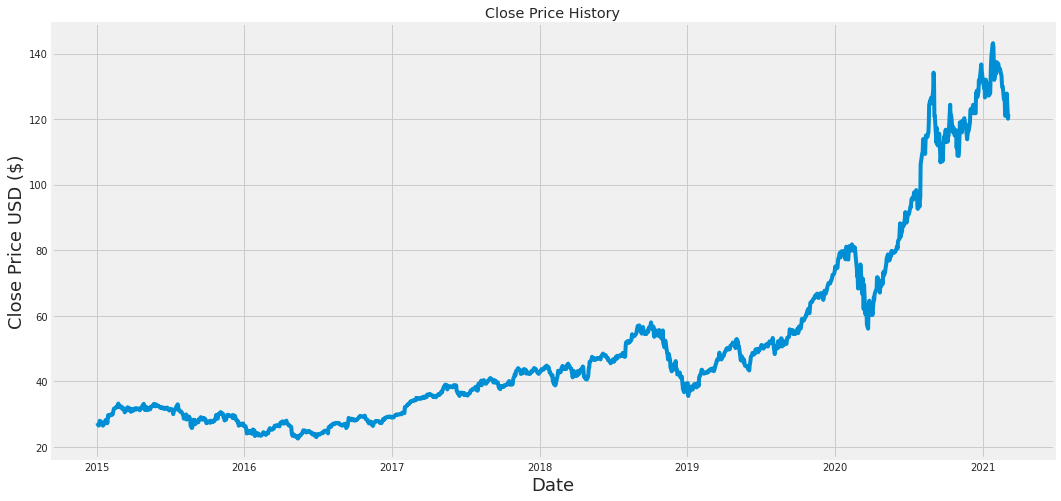

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1244

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03937384],
       [0.03298777],
       [0.03300851],
       ...,
       [0.82500514],
       [0.8089985 ],
       [0.81969725]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03937384, 0.03298777, 0.03300851, 0.03609787, 0.04468174,
       0.04493055, 0.03920797, 0.04121917, 0.04034834, 0.03416961,
       0.03244869, 0.03810907, 0.03982999, 0.04573918, 0.04694175,
       0.04719055, 0.03897989, 0.05177276, 0.05921626, 0.05560856,
       0.05865644, 0.05869791, 0.0605847 , 0.0613726 , 0.05927846,
       0.06091645, 0.06568526, 0.07161518, 0.07489115, 0.07617666,
       0.07773171, 0.07957703, 0.07901721, 0.08119428, 0.08845118,
       0.08673025, 0.07972216, 0.0831018 , 0.07903796, 0.08034418,
       0.08090401, 0.07920381, 0.07478749, 0.07518142, 0.07630106,
       0.07084803, 0.06614141, 0.07072361, 0.06894049, 0.07176031,
       0.07609372, 0.07905868, 0.07704749, 0.07373005, 0.0764462 ,
       0.07536804, 0.06850508, 0.0702882 , 0.06823554, 0.07470455])]
[0.07068215358294894]

[array([0.03937384, 0.03298777, 0.03300851, 0.03609787, 0.04468174,
       0.04493055, 0.03920797, 0.04121917, 0.04034834, 0.03416961,
       0.03244869, 0.03810907, 0.03

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1184/1184 [==============================] - 37s 29ms/step - loss: 4.5492e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.039214409427897

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


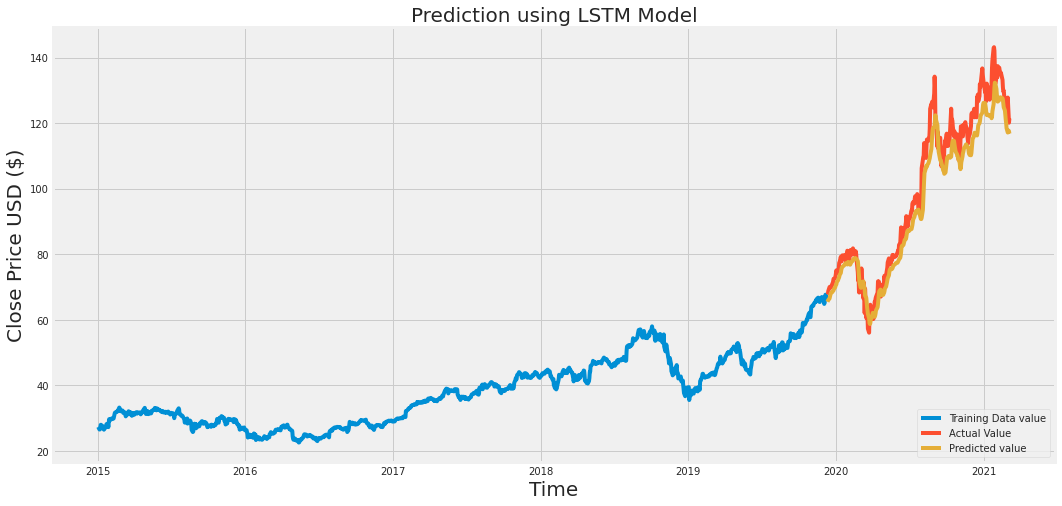

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prediction using LSTM Model', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Data value', 'Actual Value', 'Predicted value'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2019-12-11,67.692497,65.504707
2019-12-12,67.864998,65.793533
2019-12-13,68.787498,66.078453
2019-12-16,69.964996,66.470207
2019-12-17,70.102501,67.044128
...,...,...
2021-03-01,127.790001,117.129822
2021-03-02,125.120003,117.368797
2021-03-03,122.059998,117.729767


Prediction of Apple Stock Price with a RMSE of 6.04.